In [1]:
# Importing all essential Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/weight-height/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**Dataset Analysis**

In [4]:
#What is the size of the dataset?
df.shape

(10000, 3)

In [5]:
# What is the structure of the dataset?
df.sample(10)

,Gender,Height,Weight
2694,Male,63.973557,160.063502
4394,Male,66.299441,159.235988
4336,Male,68.451084,166.832799
351,Male,67.272143,182.394335
46,Male,68.251836,187.060552
5291,Female,63.599373,130.048575
3471,Male,64.042625,154.423733
3045,Male,70.968528,183.196714
8438,Female,59.893894,116.759560
2393,Male,68.011749,175.015090


In [6]:
# Are there any null values?
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [7]:
# Are there any duplicate values?
df.duplicated().sum()

0

In [8]:
# What is the datatypes of the columns?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [9]:
# What is the mathematical overview of the dataset?
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


**Preprocessing**

In [10]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [11]:
# Since the Gender column consists of categorical data. 
# Therefore, we need to convert it into numerical by mapping

df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [12]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


**Train_test_split**

In [13]:
# First, we need to apply train_test_split

from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Gender', axis=1), df['Gender'], random_state=0, test_size=0.2)

In [15]:
X_train.shape, X_test.shape

((8000, 2), (2000, 2))

**StandardScaler**

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [17]:
sc.fit(X_train)

X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [18]:
X_train_scaled

array([[-1.82162984, -1.33285162],
       [-0.63969087, -0.14847181],
       [ 1.74026908,  1.54444689],
       ...,
       [ 0.28292964,  0.02903751],
       [-1.10459869, -0.7714607 ],
       [ 1.0962628 ,  0.83831503]])

In [19]:
# the StandardScaler class returns numpy array
# Therefore, we will convert it back into dataframe

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [20]:
X_train_scaled

,Height,Weight
0,-1.821630,-1.332852
1,-0.639691,-0.148472
2,1.740269,1.544447
3,-1.026777,-1.057056
4,1.068693,0.483665
...,...,...
7995,-1.547971,-2.002733
7996,0.091590,0.392973
7997,0.282930,0.029038
7998,-1.104599,-0.771461


In [21]:
sc.mean_

array([ 66.37829176, 161.54396404])

In [22]:
np.round(X_train_scaled.describe(),1)

,Height,Weight
count,8000.0,8000.0
mean,0.0,0.0
std,1.0,1.0
min,-3.1,-3.0
25%,-0.7,-0.8
50%,-0.0,0.0
75%,0.7,0.8
max,3.3,3.4


In [23]:
#Mean = 0
#Standard Deviation = 1

# Since both parameters are correct. Therefore,
# our standardization went correctly

**Effect of Scaling**

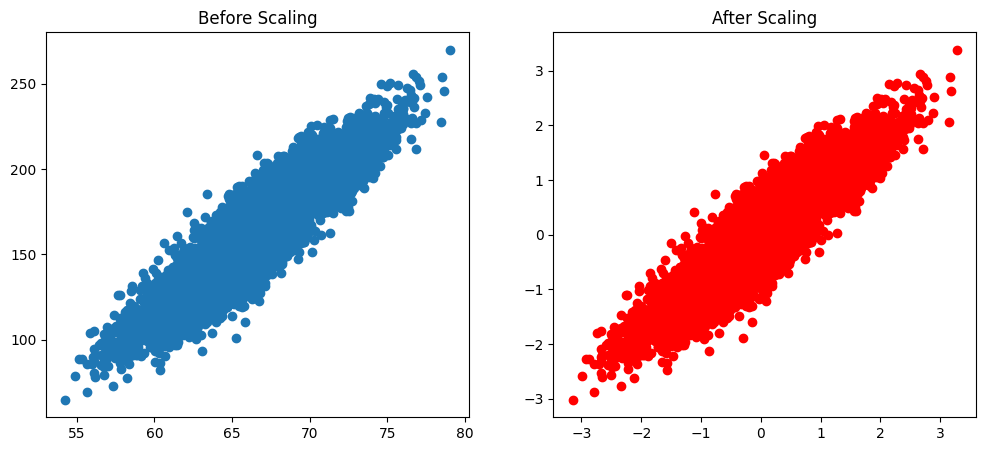

In [24]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Height'], X_train['Weight'])
ax1.set_title("Before Scaling")

ax2.scatter(X_train_scaled['Height'], X_train_scaled['Weight'], color='red')
ax2.set_title("After Scaling")

plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

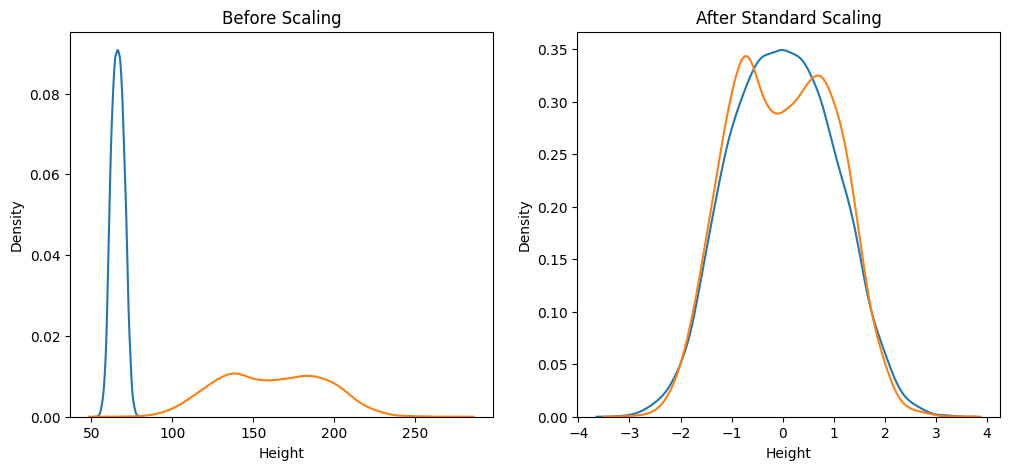

In [25]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Height'], ax=ax1)
sns.kdeplot(X_train['Weight'], ax=ax1)

# After Scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled['Height'], ax=ax2)
sns.kdeplot(X_train_scaled['Weight'], ax=ax2)
plt.show()

**Comparison of Distribution**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


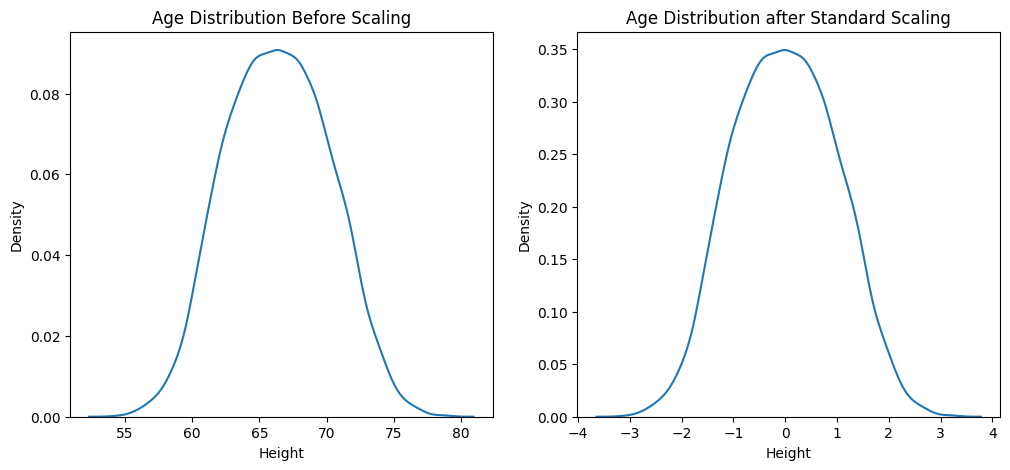

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# Before Scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Height'], ax=ax1)

# After Scaling 
ax2.set_title('Age Distribution after Standard Scaling')
sns.kdeplot(X_train_scaled['Height'], ax=ax2)
plt.show()